<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 112.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 99.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 119.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.7 MB/s eta 0:00:00
   ━

In [3]:
from IPython.display import HTML, display
def create_html_display(stats, selected_columns=None):
    """
    Creates HTML display for specified columns with enhanced styling
    #f5f5f5;
    """
    html_content = """
    <style>
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 20px;
            padding: 20px;
        }
        .stat-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
        }
        .stat-card:hover {
            transform: scale(1.02);
            background-color: #e8eaf6;
        }
        .stat-card h3 {
            color: #1976D2;
            margin-top: 0;
            border-bottom: 2px solid #1976D2;
            padding-bottom: 5px;
        }
        .stat-value {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Filter columns if specified
    if selected_columns:
        numeric_cols = {k: v for k, v in stats['numeric'].items() if k in selected_columns}
        categorical_cols = {k: v for k, v in stats['categorical'].items() if k in selected_columns}
    else:
        numeric_cols = stats['numeric']
        categorical_cols = stats['categorical']
    
    # Add numeric columns
    if numeric_cols:
        html_content += "<h2 style='color: #1976D2'>Numeric Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in numeric_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mean: <span class='stat-value'>{stat['mean']:,.2f}</span></li>
                    <li>Non-Zero Mean: <span class='stat-value'>{stat['non_zero_mean']:,.2f}</span></li>
                    <li>Median: <span class='stat-value'>{stat['median']:,.2f}</span></li>
                    <li>Mode: <span class='stat-value'>{stat['mode']:,.2f}</span></li>
                    <li>Zero Values: <span class='stat-value'>{stat['zeros']}</span></li>
                    <li>Missing Values: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total Values: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    # Add categorical columns
    if categorical_cols:
        html_content += "<h2 style='color: #1976D2'>Categorical Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in categorical_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mode: <span class='stat-value'>{stat['mode']}</span></li>
                    <li>Unique: <span class='stat-value'>{stat['unique_values']}</span></li>
                    <li>Missing: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    return html_content

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
## Write your code here
stats = {'numeric': {}, 'categorical': {}}
    
    # Handle numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    non_zero_mean = df[col][df[col] != 0].mean()
    stats['numeric'][col] = {
            'mean': df[col].mean(),
            'non_zero_mean': non_zero_mean,
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'missing': df[col].isna().sum(),
            'zeros': zero_count,
            'total': len(df[col])
        }
    
    # Handle categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
        stats['categorical'][col] = {
            'mode': df[col].mode()[0],
            'unique_values': df[col].nunique(),
            'missing': df[col].isna().sum(),
            'total': len(df[col])
        }
display(HTML(create_html_display(stats)))

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


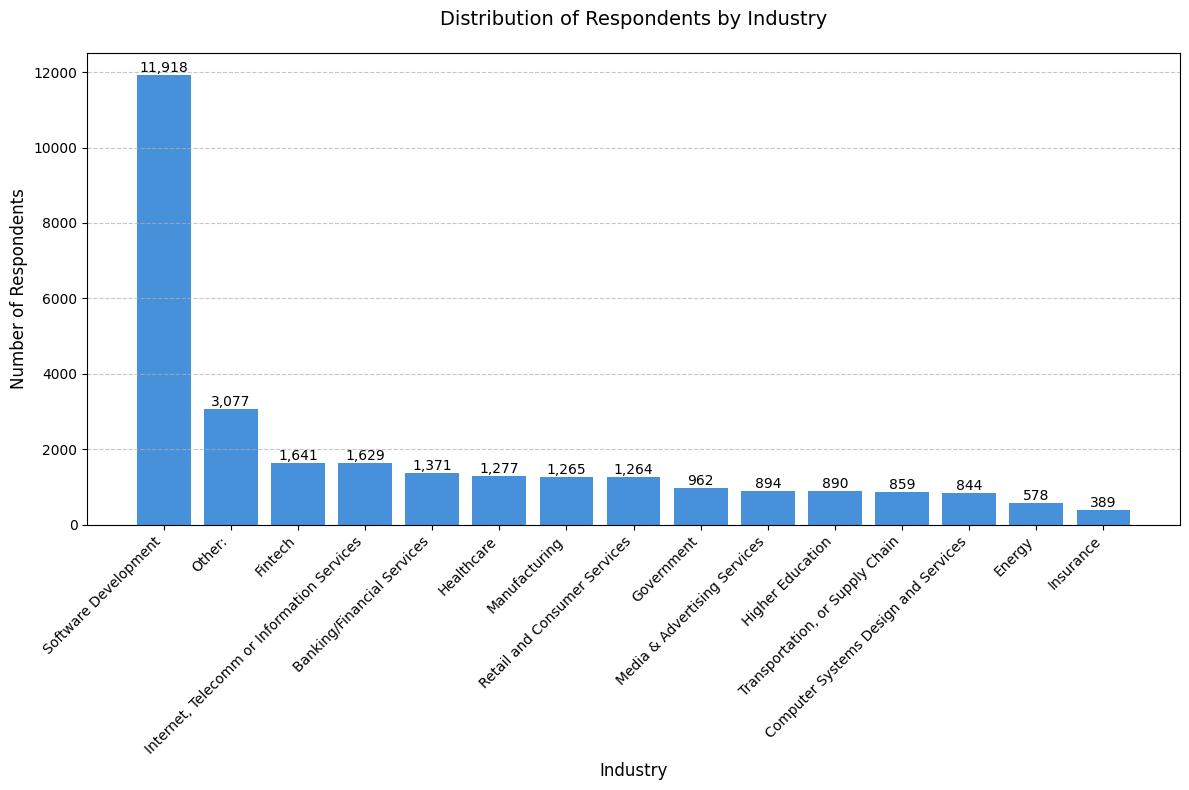

In [5]:
##Write your code here
def visualize_industry_distribution(df):
    """
    Creates comprehensive visualization of industry distribution
    """
    # Calculate industry distribution
    industry_dist = df['Industry'].value_counts()
    
    # Display statistical summary
    html_content = f"""
    <style>
        .industry-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='industry-stats'>
        <h3>Industry Distribution Insights</h3>
        <p>Total Industries: <span class='highlight'>{len(industry_dist)}</span></p>
        <p>Top Industry: <span class='highlight'>{industry_dist.index[0]}</span></p>
        <p>Top Industry Count: <span class='highlight'>{industry_dist.values[0]:,}</span></p>
        <p>Percentage in Top Industry: <span class='highlight'>{(industry_dist.values[0]/len(df)*100):.1f}%</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return industry_dist

# Execute visualization
industry_insights = visualize_industry_distribution(df)


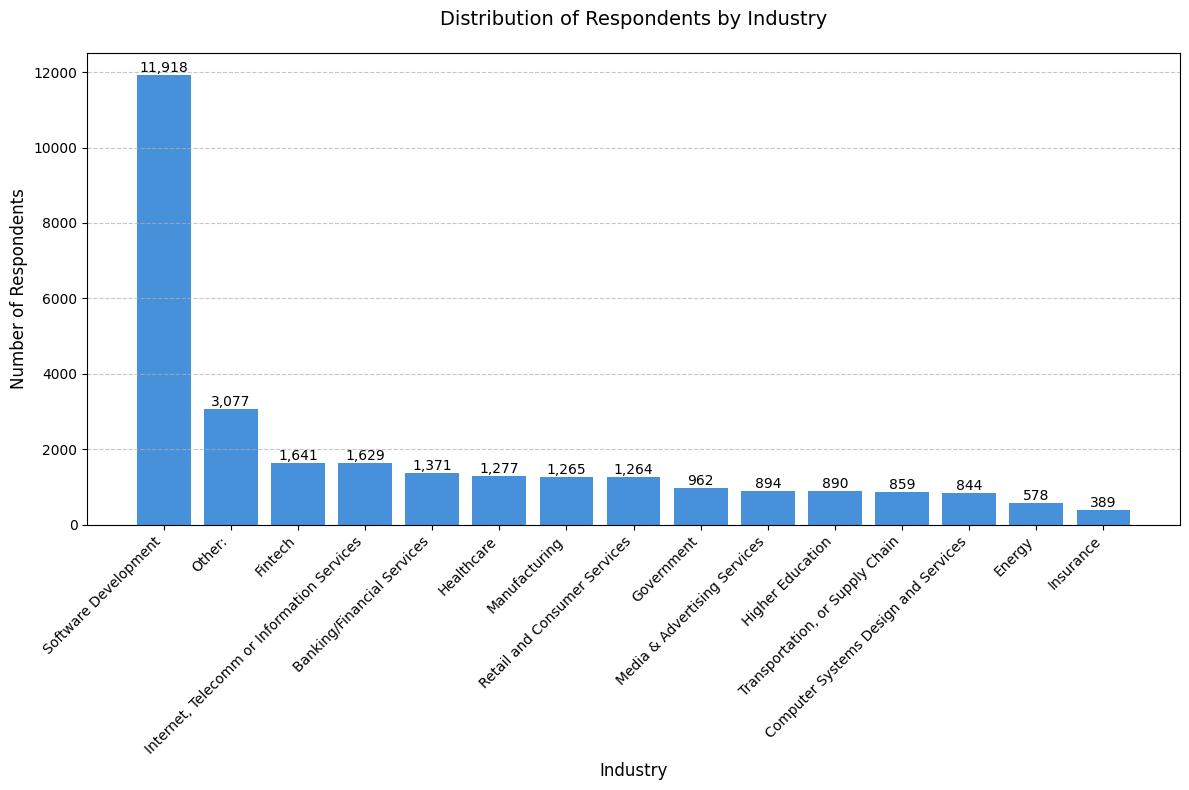

In [9]:
  # Create main bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(
        range(len(industry_insights)),
        industry_insights.values,
        color='#1976D2',
        alpha=0.8
    )
    
    # Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
            bar.get_x() + bar.get_width()/2.,
            height,
            f'{int(height):,}',
            ha='center',
            va='bottom'
        )
    
    # Customize plot
plt.title('Distribution of Respondents by Industry', pad=20, fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(range(len(industry_insights)), industry_insights.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


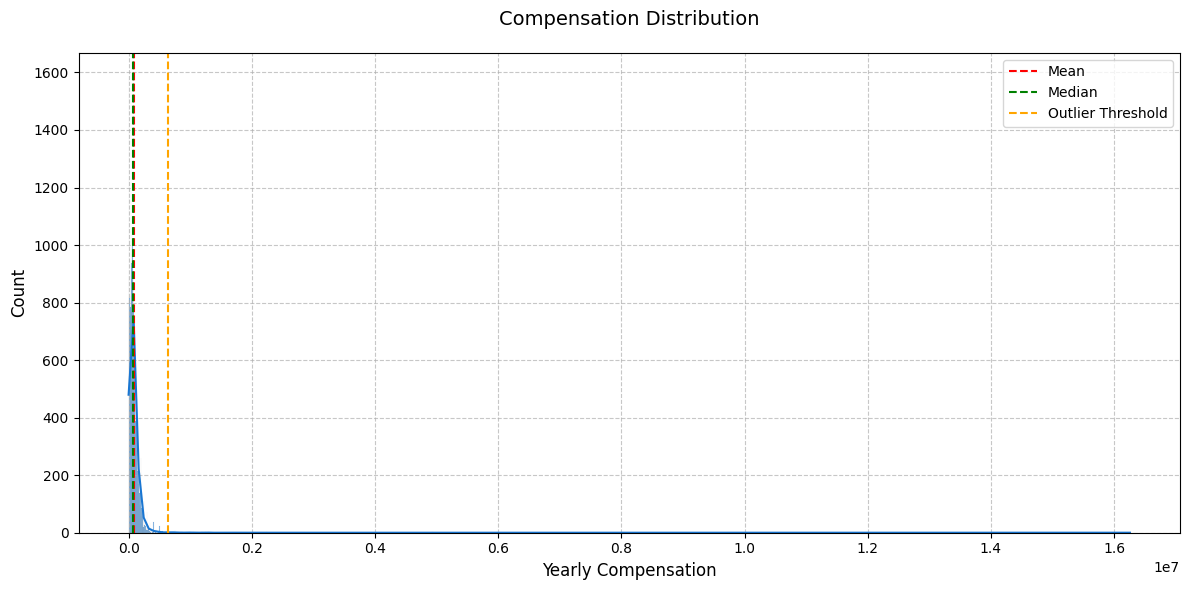

In [13]:
##Write your code here
def analyze_compensation_statistics(df, std_threshold=3):
    """
    Analyzes compensation statistics and identifies outliers
    """
    # Calculate basic statistics
    comp_stats = {
        'Mean': df['ConvertedCompYearly'].mean(),
        'Median': df['ConvertedCompYearly'].median(),
        'Std': df['ConvertedCompYearly'].std()
    }
    
    # Calculate threshold
    threshold = comp_stats['Mean'] + (std_threshold * comp_stats['Std'])
    
    # Identify outliers
    outliers = df[df['ConvertedCompYearly'] > threshold]
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot histogram with KDE
    sns.histplot(
        data=df,
        x='ConvertedCompYearly',
        kde=True,
        color='#1976D2'
    )
    
    # Add vertical lines for statistics
    plt.axvline(comp_stats['Mean'], color='red', linestyle='--', label='Mean')
    plt.axvline(comp_stats['Median'], color='green', linestyle='--', label='Median')
    plt.axvline(threshold, color='orange', linestyle='--', label='Outlier Threshold')
    
    plt.title('Compensation Distribution', pad=20, fontsize=14)
    plt.xlabel('Yearly Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    # Display statistical summary
    html_content = f"""
    <style>
        .stats-container {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='stats-container'>
        <h3>Compensation Statistics</h3>
        <p>Mean: <span class='highlight'>${comp_stats['Mean']:,.2f}</span></p>
        <p>Median: <span class='highlight'>${comp_stats['Median']:,.2f}</span></p>
        <p>Standard Deviation: <span class='highlight'>${comp_stats['Std']:,.2f}</span></p>
        <p>Outlier Threshold: <span class='highlight'>${threshold:,.2f}</span></p>
        <p>Number of Outliers: <span class='highlight'>{len(outliers)}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return comp_stats,threshold, outliers

# Execute analysis
stats,threshold, outliers = analyze_compensation_statistics(df)


In [15]:
 
# Get outliers with relevant columns
outliers_df = df[df['ConvertedCompYearly'] > threshold][
        ['ConvertedCompYearly', 'Country', 'YearsCodePro', 'Employment']
    ].sort_values('ConvertedCompYearly', ascending=False)

# Convert DataFrame to HTML table
outliers_html = outliers_df.to_html(
        classes='outliers-table',
        float_format=lambda x: f'${x:,.2f}' if isinstance(x, float) else x
    )
display(HTML(outliers_html))

,ConvertedCompYearly,Country,YearsCodePro,Employment
15837,"$16,256,603.00",Ethiopia,5,"Independent contractor, freelancer, or self-employed;Employed, part-time"
12723,"$13,818,022.00",South Africa,10,"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time"
28379,"$9,000,000.00",Taiwan,7,"Employed, full-time"
17593,"$6,340,564.00",Brazil,13,"Employed, full-time"
17672,"$4,936,778.00",Ukraine,11,"Employed, full-time"
19267,"$3,367,716.00",India,7,"Employed, full-time"
23694,"$2,584,118.00",Pakistan,5,"Employed, full-time;Independent contractor, freelancer, or self-employed"
33720,"$2,237,846.00",Brazil,5,"Independent contractor, freelancer, or self-employed"
34523,"$2,153,432.00",Pakistan,2,"Employed, full-time"
13763,"$2,048,046.00",Australia,12,"Employed, full-time"


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


,ConvertedCompYearly,Country,YearsCodePro,Employment
15837,"$16,256,603.00",Ethiopia,5,"Independent contractor, freelancer, or self-employed;Employed, part-time"
12723,"$13,818,022.00",South Africa,10,"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time"
28379,"$9,000,000.00",Taiwan,7,"Employed, full-time"
17593,"$6,340,564.00",Brazil,13,"Employed, full-time"
17672,"$4,936,778.00",Ukraine,11,"Employed, full-time"
19267,"$3,367,716.00",India,7,"Employed, full-time"
23694,"$2,584,118.00",Pakistan,5,"Employed, full-time;Independent contractor, freelancer, or self-employed"
33720,"$2,237,846.00",Brazil,5,"Independent contractor, freelancer, or self-employed"
34523,"$2,153,432.00",Pakistan,2,"Employed, full-time"
13763,"$2,048,046.00",Australia,12,"Employed, full-time"


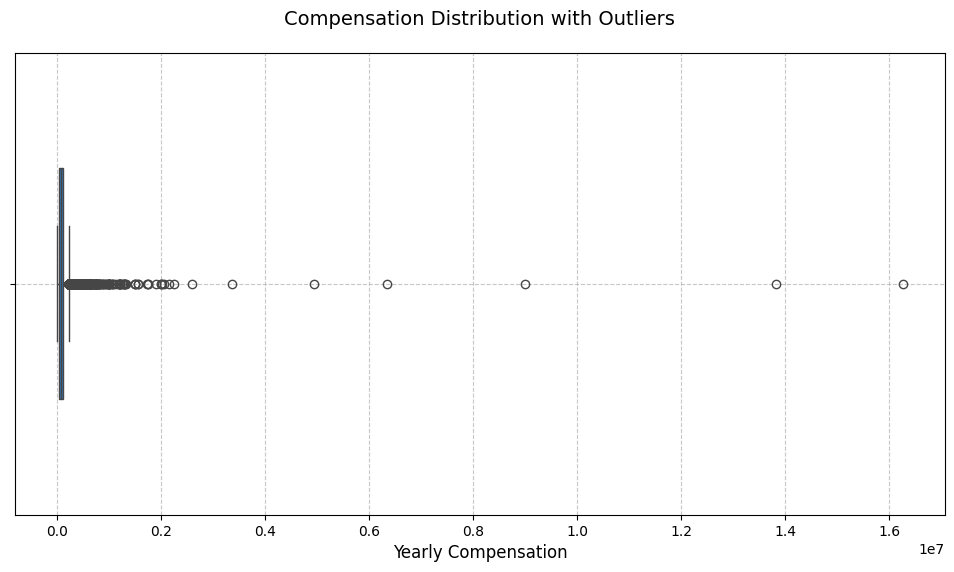

In [19]:
##Write your code here
def analyze_compensation_iqr(df):
    """
    Analyzes compensation outliers using IQR method
    """
    # Calculate IQR statistics
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[
        (df['ConvertedCompYearly'] < lower_bound) | 
        (df['ConvertedCompYearly'] > upper_bound)
    ]
    
    # Identify outliers with relevant columns
    outliers_df = df[
        (df['ConvertedCompYearly'] < lower_bound) | 
        (df['ConvertedCompYearly'] > upper_bound)
    ][['ConvertedCompYearly', 'Country', 'YearsCodePro', 'Employment']].sort_values('ConvertedCompYearly', ascending=False)
    

    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Create box plot
    sns.boxplot(
        x=df['ConvertedCompYearly'],
        color='#1976D2',
        width=0.5
    )
    
    plt.title('Compensation Distribution with Outliers', pad=20, fontsize=14)
    plt.xlabel('Yearly Compensation', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display statistical summary
    html_content = f"""
    <style>
        .iqr-stats {{
            margin: 20px;
            padding: 15px;
            background-color: #black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='iqr-stats'>
        <h3>IQR Analysis Results</h3>
        <p>Q1: <span class='highlight'>${Q1:,.2f}</span></p>
        <p>Q3: <span class='highlight'>${Q3:,.2f}</span></p>
        <p>IQR: <span class='highlight'>${IQR:,.2f}</span></p>
        <p>Lower Bound: <span class='highlight'>${lower_bound:,.2f}</span></p>
        <p>Upper Bound: <span class='highlight'>${upper_bound:,.2f}</span></p>
        <p>Number of Outliers: <span class='highlight'>{len(outliers)}</span></p>
        <p>Percentage of Outliers: <span class='highlight'>{(len(outliers)/len(df)*100):.2f}%</span></p>
    </div>
    <div class='outliers-table'>
        <h3>Outlier Details</h3>
        {outliers_df.to_html(float_format=lambda x: f'${x:,.2f}' if isinstance(x, float) else x)}
    </div>
    """
    
    display(HTML(html_content))
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers,
        'outliers_df': outliers_df
    }

# Execute analysis
iqr_results = analyze_compensation_iqr(df)


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


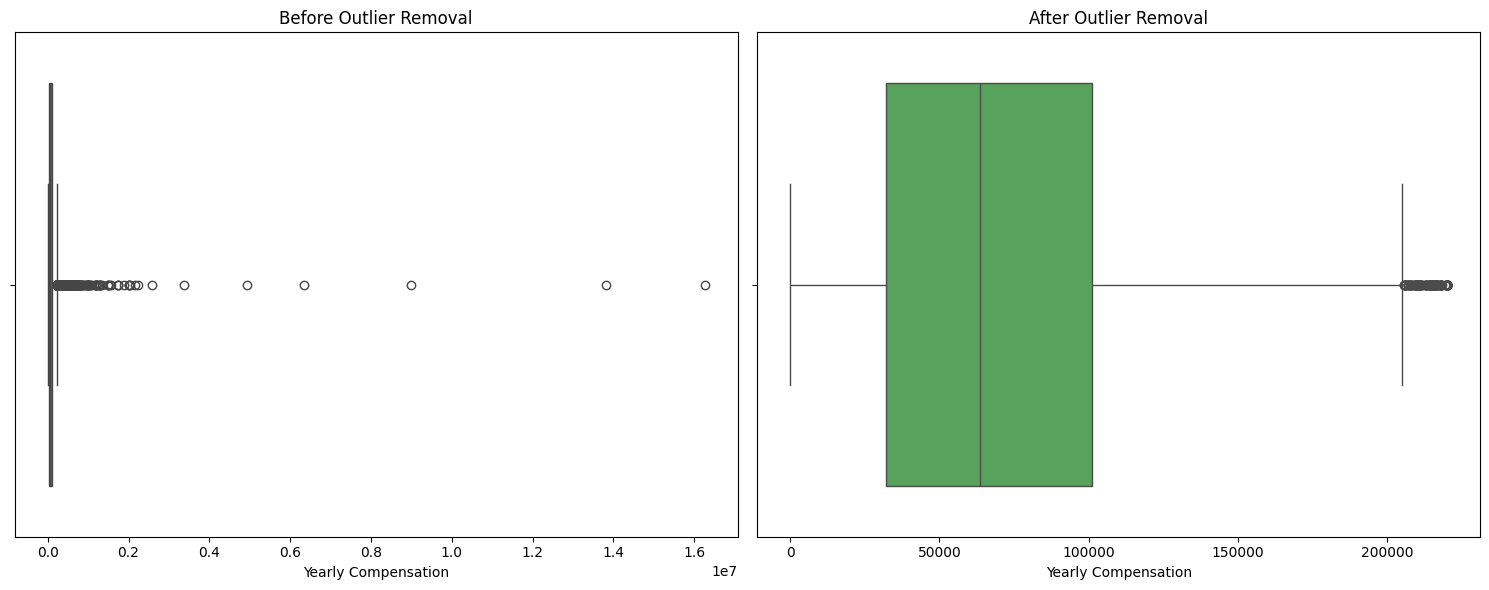

In [21]:
##Write your code here
def remove_compensation_outliers(df):
    """
    Creates clean dataset by removing compensation outliers using IQR method
    """
    # Calculate IQR bounds
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create clean dataset
    clean_df = df[
        (df['ConvertedCompYearly'] >= lower_bound) & 
        (df['ConvertedCompYearly'] <= upper_bound)
    ].copy()
    
    # Validate results
    html_content = f"""
    <style>
        .validation-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='validation-stats'>
        <h3>Dataset Cleaning Results</h3>
        <p>Original Size: <span class='highlight'>{len(df):,}</span></p>
        <p>Clean Size: <span class='highlight'>{len(clean_df):,}</span></p>
        <p>Removed Rows: <span class='highlight'>{len(df) - len(clean_df):,}</span></p>
        <p>Percentage Retained: <span class='highlight'>{(len(clean_df)/len(df)*100):.2f}%</span></p>
    </div>
    """
    
    display(HTML(html_content))
    
    # Visualize before and after distributions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x=df['ConvertedCompYearly'], ax=ax1, color='#1976D2')
    ax1.set_title('Before Outlier Removal')
    ax1.set_xlabel('Yearly Compensation')
    
    sns.boxplot(x=clean_df['ConvertedCompYearly'], ax=ax2, color='#4CAF50')
    ax2.set_title('After Outlier Removal')
    ax2.set_xlabel('Yearly Compensation')
    
    plt.tight_layout()
    
    return clean_df

# Execute cleaning
clean_dataset = remove_compensation_outliers(df)


In [22]:
clean_dataset.to_csv('gs_lab12_survey_data.csv', index=False)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [25]:
print(clean_dataset['Age'].unique())

['18-24 years old' '25-34 years old' '35-44 years old' '45-54 years old'
 '55-64 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']


In [30]:
def map_age_to_numeric(df):
    """
    Maps age ranges to numeric values using midpoints
    """
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    
    # Create new column with mapped values
    df['Age_Numeric'] = df['Age'].map(age_mapping)
    return df
map_age_to_numeric(clean_dataset)
print(clean_dataset.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Age_Numeric'],
      dtype='object', length=115)


,Age_Numeric
Age_Numeric,1.000000
WorkExp,0.845127
ConvertedCompYearly,0.369685
JobSat,0.067167
CompTotal,-0.021381
JobSatPoints_1,-0.038959
ResponseId,-0.040530
JobSatPoints_6,-0.051358
JobSatPoints_8,-0.051506
JobSatPoints_4,-0.069942


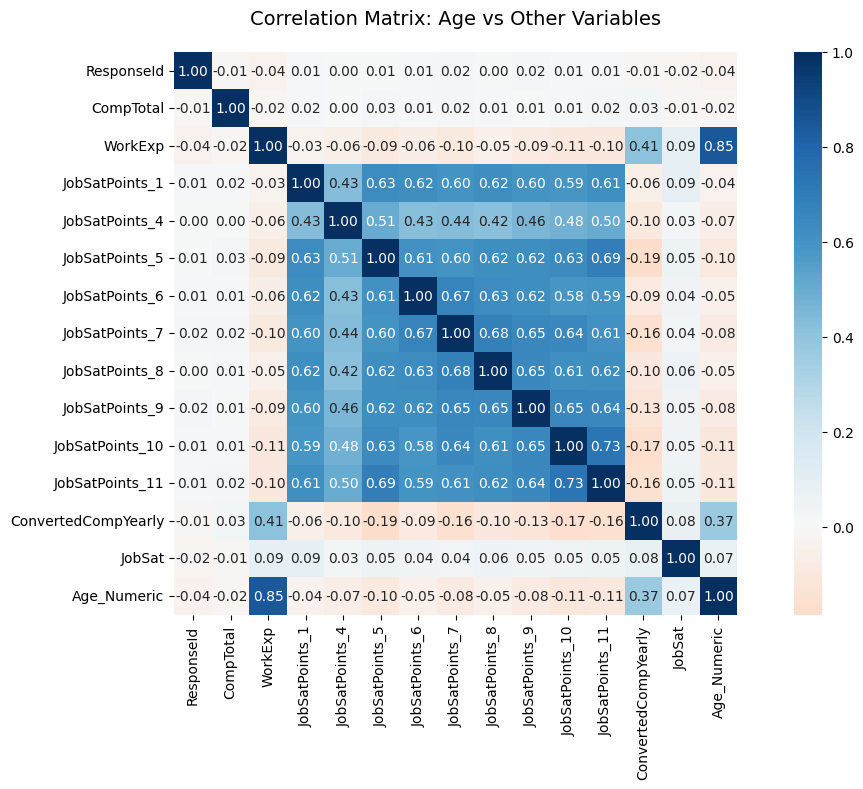

In [34]:
##Write your code here
def analyze_age_correlations(df):
    """
    Analyzes correlations between Age and other numerical variables
    """
    # Select numerical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate correlation matrix
    correlation_matrix = df[numeric_cols].corr()
    
    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='RdBu',
        center=0,
        fmt='.2f',
        square=True
    )
    
    plt.title('Correlation Matrix: Age vs Other Variables', pad=20, fontsize=14)
    plt.tight_layout()
    
    # Extract age correlations
    age_correlations = correlation_matrix['Age_Numeric'].sort_values(ascending=False)
    
    # Display correlation insights
    html_content = f"""
    <style>
        .correlation-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin-top: 15px;
        }}
        th {{
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }}
        td {{
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }}
    </style>
    
    <div class='correlation-stats'>
        <h3>Age Correlation Analysis</h3>
        <p>Strongest Positive Correlation: <span class='highlight'>{age_correlations.index[1]} ({age_correlations.values[1]:.3f})</span></p>
        <p>Strongest Negative Correlation: <span class='highlight'>{age_correlations.index[-1]} ({age_correlations.values[-1]:.3f})</span></p>
        
        <h4>All Age Correlations:</h4>
        {age_correlations.to_frame().to_html()}
    </div>
    """
    
    display(HTML(html_content))
    return age_correlations

# Execute analysis
age_correlation_results = analyze_age_correlations(clean_dataset)

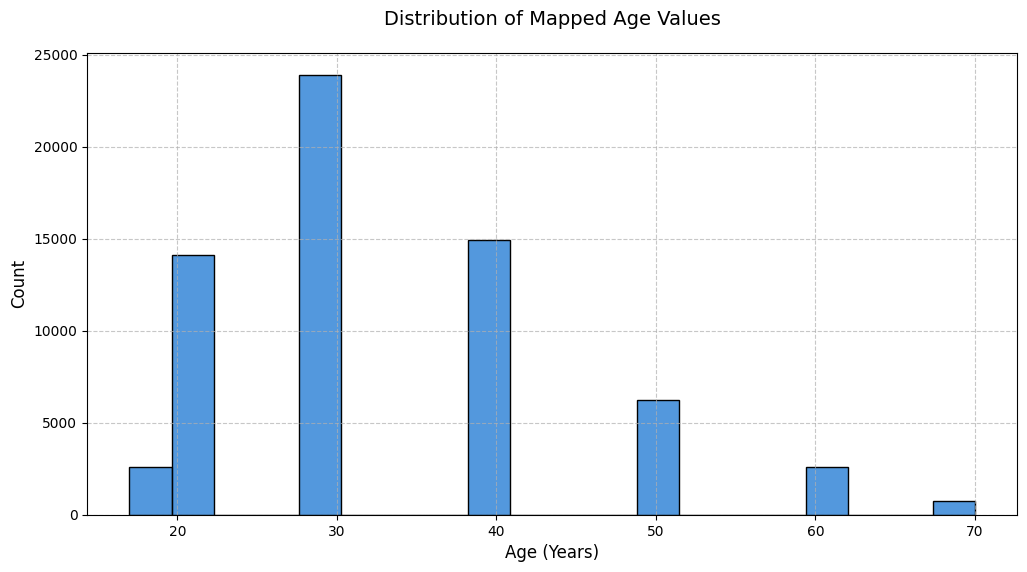

In [36]:
def map_age_to_numeric(df):
    """
    Maps age ranges to numeric values using midpoints
    """
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    
    # Create new column with mapped values
    df['Age_Numeric'] = df['Age'].map(age_mapping)
    
    # Visualize distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=df,
        x='Age_Numeric',
        bins=20,
        color='#1976D2'
    )
    
    plt.title('Distribution of Mapped Age Values', pad=20, fontsize=14)
    plt.xlabel('Age (Years)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display mapping summary
    html_content = f"""
    <style>
        .mapping-stats {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='mapping-stats'>
        <h3>Age Mapping Results</h3>
        <p>Original Categories: <span class='highlight'>{len(age_mapping)}</span></p>
        <p>Mean Age: <span class='highlight'>{df['Age_Numeric'].mean():.2f}</span></p>
        <p>Median Age: <span class='highlight'>{df['Age_Numeric'].median():.2f}</span></p>
        <p>Missing Values: <span class='highlight'>{df['Age_Numeric'].isna().sum()}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return df['Age_Numeric']

# Execute mapping
age_numeric = map_age_to_numeric(df)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
